In [5]:
import project as p
import Distance_SC as dsc
from make_sc_example import ScanContext
scm = ScanContext()

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
particles = np.array([[0,0,0,1,0,0,0]]).astype(np.float64)
states = []
for i in range(100):
    particles= p.predict_particles(particles)
    states.append(particles[0])
states = np.stack(states)

In [53]:
#data = p.load_data("rgbd_dataset_freiburg1_xyz")
seq_name = "rgbd_dataset_freiburg1_xyz"
data = p.load_data(seq_name)
print(len(data))
train_data = data[:1800] #3300 for plant 3
val_data = data[1800:]

# features = p.gen_features_seq(model,data,name=seq_name)
#features = np.load("features_desk.npy")[:1800]
# features = np.load("features.npy")[:1800]
# scarr = []
# for i in range(len(data)):
#     pcd = p.pcd2np(p.pcd_at(seq_name,data,i))
#     sc = scm.ptcloud2sc(pcd,32,8,2)
#     scarr.append(sc)
#     print(i)

2654


/Data/avery/se3_equivariant_place_recognition/project.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sync_data = np.array(sync_data)


In [15]:

tree = p.make_tree(train_data)

In [16]:
np.save("sc_xyz",scarr)

In [36]:
from Distance_SC import distance_sc

distance_sc(scarr[0],scarr[2000])
# np.linalg.norm(scarr[0]-scarr[6])

0.19465046568187483

In [54]:
index = 0
def update(particles,weights,index):
    if(index>2):
        particles = p.gaussian_resample(particles,weights,nparticles)
    particles = p.predict_particles(particles)
    pcd = p.pcd2np(p.pcd_at(seq_name,val_data,index))
    # pcd = p.pcd_at("rgbd_dataset_freiburg1_xyz",val_data,index)
    weights = p.correct_particles_sc(particles,scm,pcd,tree,scarr[:1800])
    #articles,weights = p.resample_particles(particles,weights)
    return particles,np.stack(weights)

In [55]:
initialPose = val_data[0,1]
particles = []
nparticles= 50
weights = np.ones(nparticles)/nparticles
for i in range(nparticles):
    particles.append(initialPose)
particles = np.stack(particles)

print(len(val_data))
print(len(train_data))
print(len(data))
index = 0
estimates=[]
covariances = []

854
1800
2654


In [56]:

while index <len(val_data):
    estimate = np.sum(particles*weights.reshape((-1,1)),axis=0) 
    particles,weights=update(particles,weights,index)
    estimates.append(estimate)
    print("%d %f" % (len(val_data)-index, np.linalg.norm(estimate[:3]-val_data[index,1][:3])))
    index+=1

854 0.000000
853 0.025667
852 0.042531
851 0.074794
850 0.073792
849 0.054597
848 0.106383
847 0.104092
846 0.087044
845 0.118726
844 0.102463
843 0.072232
842 0.086034
841 0.065559
840 0.098293
839 0.094167
838 0.116015
837 0.127710
836 0.092398
835 0.082680
834 0.075458
833 0.066341
832 0.094339
831 0.077377
830 0.054420
829 0.056751
828 0.077381
827 0.081464
826 0.082131
825 0.065522
824 0.067220
823 0.078802
822 0.051253
821 0.079013
820 0.076127
819 0.124425
818 0.124965
817 0.123761
816 0.117375
815 0.105070
814 0.112981
813 0.134155
812 0.101680
811 0.070030
810 0.087319
809 0.120291
808 0.125560


KeyboardInterrupt: 

[1.44493298e-14 2.84808675e-02 4.89925445e-02 7.66609160e-02
 7.33550302e-02 7.96007422e-02 9.05876749e-02 9.84039685e-02
 1.06022822e-01 1.13112443e-01 1.14274727e-01 1.22499751e-01
 1.19967820e-01 1.08903859e-01]


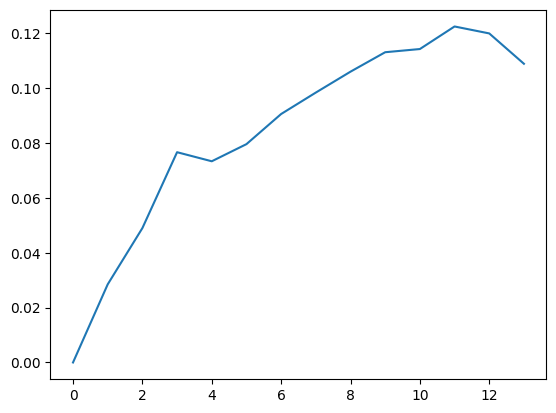

In [43]:
gt = np.stack(val_data[:,1])
numest = len(estimates)

delta = np.linalg.norm(gt[:numest,:]-np.stack(estimates),axis=1)
#np.save("estimates_xyz_1",np.stack(estimates))
print(delta)
plt.plot(np.arange(numest),delta)
plt.show()

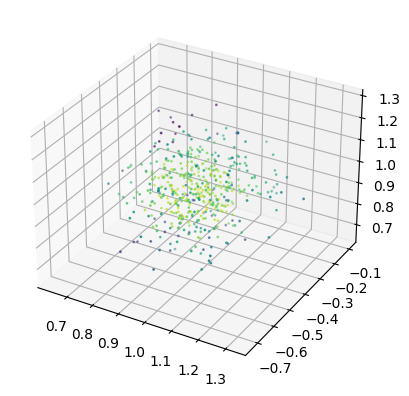

1.9967020832558993
[ 0.9748 -0.3818  1.0941  0.3375  0.6921 -0.5526 -0.319 ]
[ 0.97142845 -0.41737838  0.96484456 -0.34043887 -0.65827177  0.57746977
  0.32027486]
63


In [176]:
vis_particles(particles,weights)
particles,weights=update(particles,weights,index)
index+=1
estimate = np.sum(particles*weights.reshape((-1,1)),axis=0)

gt = data[index,1]
print(np.linalg.norm(gt-estimate))
print(gt)
print(estimate)
print(index)

In [37]:
print(len(val_data))

776


In [11]:
gt = []
for i in range(len(estimates)):
    gt.append(val_data[i,1])
gt = np.array(gt)
print(gt)

[[ 1.3038  0.8567  1.5171 ...  0.2466 -0.0941 -0.3912]
 [ 1.3063  0.8548  1.5175 ...  0.2431 -0.0923 -0.3924]
 [ 1.3088  0.8528  1.5181 ...  0.2395 -0.091  -0.3918]
 ...
 [ 0.9455 -0.004   1.2883 ...  0.2745 -0.0949 -0.3305]
 [ 0.9454 -0.0038  1.2886 ...  0.2744 -0.0951 -0.3313]
 [ 0.9453 -0.0038  1.2888 ...  0.2746 -0.095  -0.331 ]]


In [145]:
np.savetxt('gt_desk2.txt',gt,delimiter=',')
np.savetxt('estimates_desk2.txt',estimates,delimiter=',')

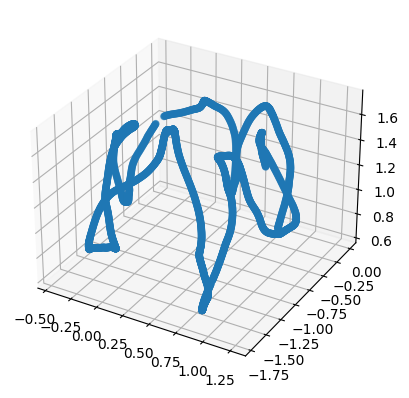

In [134]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(gt[:,0],gt[:,1],gt[:,2])

In [148]:

def vis_particles(particles,weights):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(particles[:,0],particles[:,1],particles[:,2],c=weights,s=np.exp(weights))
    plt.show()

In [70]:
np.save("features_desk",features)

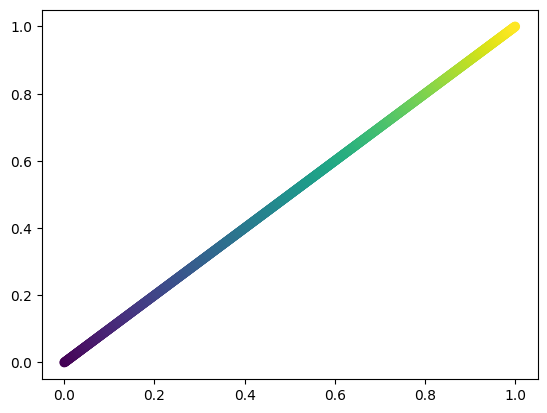

In [259]:
x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
plt.scatter(x,y,c=x)
plt.show()

In [131]:
features = np.load("features_desk.npy")
poses = np.stack(data[:,1])

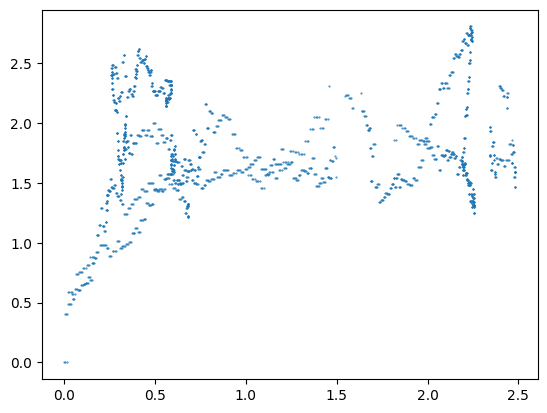

In [148]:
center = 200
feat_dst = np.linalg.norm(features-features[center],axis=1)
pose_dst = np.linalg.norm(poses-poses[center],axis=1)
plt.scatter(pose_dst,feat_dst,s=0.2)
plt.show()

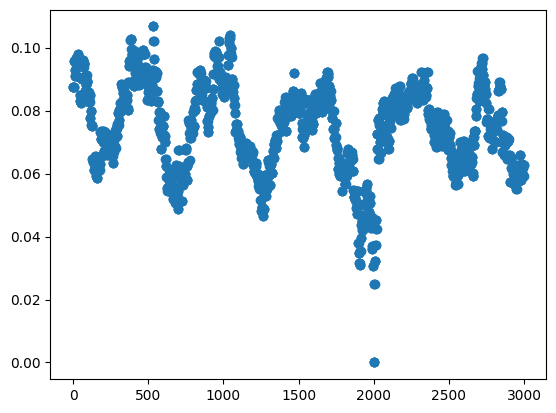

In [51]:
norms = np.linalg.norm(features-features[2000],axis=1)
plt.scatter(np.arange(len(norms)),norms)